### Student Information
Name:李信儒(Hsin-Ju Li)

Student ID:110033630

GitHub ID:popo6699325

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

## 2.1 Data Preparation

In [1]:
### Begin Assignment Here
#get amazon data
amazon = []
tmp = 'initial'
with open('sentiment labelled sentences\\amazon_cells_labelled.txt','r') as fh:
    while tmp:
        tmp = fh.readline()
        tmp=tmp.strip('\n')
        if tmp != '':
            amazon.append(tmp)
# get imdb data
imdb = []
tmp = 'initial'
with open('sentiment labelled sentences\\imdb_labelled.txt','r',encoding="utf-8") as fh:
    while tmp:
        tmp = fh.readline()
        tmp=tmp.strip('\n')
        if tmp != '':
            imdb.append(tmp)
#get yelp data
yelp = []
tmp = 'initial'
with open('sentiment labelled sentences\\yelp_labelled.txt','r') as fh:
    while tmp:
        tmp = fh.readline()
        tmp=tmp.strip('\n')
        if tmp != '':
            yelp.append(tmp)

In [2]:
All_data = []
All_label = []
All_category_name = []
All_category = []

for information in amazon:
    tmp = information.split('\t')
    All_data.append(tmp[0])
    All_label.append(int(tmp[1]))
    #All_category_name.append('amazon')
    All_category.append(0)
    
for information in imdb:
    tmp = information.split('\t')
    All_data.append(tmp[0])
    All_label.append(int(tmp[1]))  
    #All_category_name.append('imdb')
    All_category.append(1)
    
for information in yelp:
    tmp = information.split('\t')
    All_data.append(tmp[0])
    All_label.append(int(tmp[1]))
    #All_category_name.append('yelp')
    All_category.append(2)

All = []
All.append(All_data)
All.append(All_label)
#All.append(All_category_name)

## 2.2 Data Transformation

In [3]:
import pandas as pd
import numpy as np
df_All = pd.DataFrame(np.array(All).T, columns = ['sentence', 'sentiment_label'])
df_All

,sentence,sentiment_label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


In [4]:
print(len(df_All))
df_All[0:10]

3000


,sentence,sentiment_label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [5]:
for t in df_All['sentence'][:5]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
The mic is great.


In [6]:
df_All['category']  = All_category
df_All['category_name']=df_All.category.apply(lambda x:'amazon' if x == 0 else ('imdb' if x==1 else 'yelp'))
df_All[1010:1020]

,sentence,sentiment_label,category,category_name
1010,And those baby owls were adorable.,1,1,imdb
1011,The movie showed a lot of Florida at it's best...,1,1,imdb
1012,The Songs Were The Best And The Muppets Were S...,1,1,imdb
1013,It Was So Cool.,1,1,imdb
1014,"This is a very ""right on case"" movie that deli...",1,1,imdb
1015,It had some average acting from the main perso...,0,1,imdb
1016,"This review is long overdue, since I consider ...",1,1,imdb
1017,I'll put this gem up against any movie in term...,1,1,imdb
1018,It's practically perfect in all of them  a tr...,1,1,imdb
1019,""" The structure of this film is easily the mos...",1,1,imdb


In [7]:
df_All[-10:][['sentence','category_name']]

,sentence,category_name
2990,The refried beans that came with my meal were ...,yelp
2991,Spend your money and time some place else.,yelp
2992,A lady at the table next to us found a live gr...,yelp
2993,the presentation of the food was awful.,yelp
2994,I can't tell you how disappointed I was.,yelp
2995,I think food should have flavor and texture an...,yelp
2996,Appetite instantly gone.,yelp
2997,Overall I was not impressed and would not go b...,yelp
2998,"The whole experience was underwhelming, and I ...",yelp
2999,"Then, as if I hadn't wasted enough of my life ...",yelp


In [8]:
df_All.iloc[::10,0:3][0:5]

,sentence,sentiment_label,category
0,So there is no way for me to plug it in here i...,0,0
10,And the sound quality is great.,1,0
20,I went on Motorola's website and followed all ...,0,0
30,"This is a simple little phone to use, but the ...",0,0
40,"It has a great camera thats 2MP, and the pics ...",1,0


In [9]:
df_All.loc[::200,'category'][0:15]

0       0
200     0
400     0
600     0
800     0
1000    1
1200    1
1400    1
1600    1
1800    1
2000    2
2200    2
2400    2
2600    2
2800    2
Name: category, dtype: int64

In [10]:
df_All.loc[lambda t: t['category'] > 1,:][0:10]

,sentence,sentiment_label,category,category_name
2000,Wow... Loved this place.,1,2,yelp
2001,Crust is not good.,0,2,yelp
2002,Not tasty and the texture was just nasty.,0,2,yelp
2003,Stopped by during the late May bank holiday of...,1,2,yelp
2004,The selection on the menu was great and so wer...,1,2,yelp
2005,Now I am getting angry and I want my damn pho.,0,2,yelp
2006,Honeslty it didn't taste THAT fresh.),0,2,yelp
2007,The potatoes were like rubber and you could te...,0,2,yelp
2008,The fries were great too.,1,2,yelp
2009,A great touch.,1,2,yelp


In [11]:
df_All.loc[lambda t: t.sentiment_label == '1'].iloc[::70,:][0:20]

,sentence,sentiment_label,category,category_name
1,"Good case, Excellent value.",1,0,amazon
130,It is so small and you don't even realize that...,1,0,amazon
271,Worked perfectly!,1,0,amazon
398,"Sounds good reasonably priced and effective, I...",1,0,amazon
534,Great case and price!,1,0,amazon
689,Works well.,1,0,amazon
817,Gets a signal when other Verizon phones won't.,1,0,amazon
961,I was very impressed with the price of the cases.,1,0,amazon
1099,If you are looking for a movie with a terrific...,1,1,imdb
1304,"his performance, as awarded, was stunning.",1,1,imdb


## 2.3 Data Mining using Pandas

### 2.3.1 Missing Values

In [12]:
df_All.isnull()

,sentence,sentiment_label,category,category_name
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2995,False,False,False,False
2996,False,False,False,False
2997,False,False,False,False
2998,False,False,False,False


In [13]:
import helpers.data_mining_helpers as dmh
df_All.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,sentiment_label,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [14]:
df_All.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1 )

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

In [15]:
dummy_series = pd.Series(["dummy_record", 1], index=["sentence", "category"])
dummy_series

sentence    dummy_record
category               1
dtype: object

In [16]:
result_with_series =df_All.append(dummy_series, ignore_index=True)
print(len(result_with_series))
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

3001


,sentence,sentiment_label,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,1,0,1


In [17]:
dummy_dict = [{'sentence': 'dummy_record',
               'category': '1'
              }]
df_All_dummy = df_All.append(dummy_dict, ignore_index=True)
print(len(df_All_dummy))
df_All_dummy.isnull().apply(lambda x: dmh.check_missing_values(x))

3001


,sentence,sentiment_label,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,1,0,1


In [18]:
df_All_dummy.dropna(inplace=True)   #remove the raw of missing value
df_All_dummy.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,sentiment_label,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [19]:
print(len(df_All_dummy))

3000


### 2.3.2 Dealing with Duplicate Data

In [20]:
no_duplicate = df_All[:]
no_duplicate.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [21]:
sum(no_duplicate.duplicated('sentence'))

17

In [22]:
print(len(no_duplicate))
no_duplicate.drop_duplicates(keep='first', inplace=True)  #remove duplicate but keep 1 element
print(len(no_duplicate))

3000
2983


<ipython-input-22-639f716a5ef5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_duplicate.drop_duplicates(keep='first', inplace=True)  #remove duplicate but keep 1 element


## 2.4 Data Preprocessing

### 2.4.1 Sampling

In [23]:
df_All_sample = df_All.sample(n=1000) #random state
print(len(df_All_sample))
df_All_sample[0:4]

1000


,sentence,sentiment_label,category,category_name
1096,The scenes are often funny and occasionally to...,1,1,imdb
69,This device is great in several situations:1.),1,0,amazon
2137,This is one of the best bars with food in Vegas.,1,2,yelp
508,great...no problems at all!.,1,0,amazon


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

yelp      1000
amazon    1000
imdb      1000
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

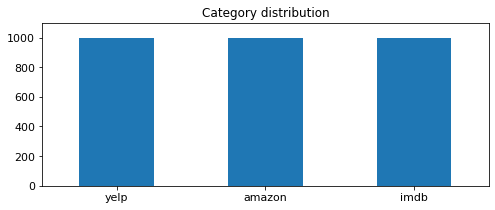

In [25]:
print(df_All.category_name.value_counts())
df_All.category_name.value_counts().plot(kind = 'bar',
                                        title = 'Category distribution',
                                        ylim = [0, 1100],        
                                        rot = 0, fontsize = 11, figsize = (8,3))

amazon    354
yelp      328
imdb      318
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

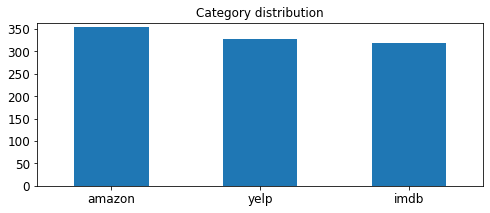

In [26]:
upper_bound = max(df_All_sample.category_name.value_counts()) +10
print(df_All_sample.category_name.value_counts())

# plot barchart for X_sample
df_All_sample.category_name.value_counts().plot(kind = 'bar',
                                               title = 'Category distribution',
                                               ylim = [0, upper_bound], 
                                               rot = 0, fontsize = 12, figsize = (8,3))

yelp      1000
amazon    1000
imdb      1000
Name: category_name, dtype: int64
amazon    354
yelp      328
imdb      318
Name: category_name, dtype: int64
<class 'pandas.core.series.Series'>
           X  X_sample
yelp    1000       328
amazon  1000       354
imdb    1000       318


<AxesSubplot:title={'center':'Category_name distribution'}>

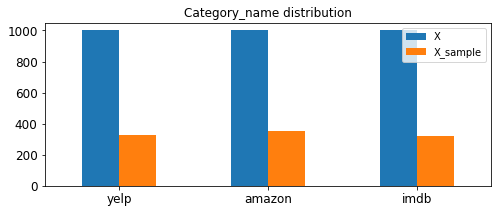

In [27]:
Y_X = df_All.category_name.value_counts()
Y_X_sample = df_All_sample.category_name.value_counts()

print(Y_X)
print(Y_X_sample)
print(type(Y_X))
df = pd.concat([Y_X,Y_X_sample], axis=1)
df.columns = ['X', 'X_sample']
print(df)
df.plot(kind = 'bar',
        title = 'Category_name distribution',
        rot = 0, fontsize = 12, figsize = (8,3))

### 2.4.2 Feature Creation

In [28]:
import nltk

In [29]:
df_All['unigrams'] = df_All['sentence'].apply(lambda x: dmh.tokenize_text(x))
df_All[0:4]['unigrams']

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [30]:
list(df_All[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### 2.4.3 Feature subset selection

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_All_counts = count_vect.fit_transform(df_All.sentence)

analyze = count_vect.build_analyzer()
analyze(" ".join(list(df_All[:1].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [32]:
print(df_All_counts.shape)
print(count_vect.get_feature_names()[0:10])

(3000, 5155)
['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']


In [33]:
df_All_counts[0:5,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [34]:
array = df_All_counts[3:4].toarray()[0]
count = 0
first = 0
for i in range(len(array)):
    if array[i] == 1:
        count+=1
        if count == 1:
            first = i
            break
print("The "+str(first+1)+" record :",end='')
print(count_vect.get_feature_names()[first])

The 46 record :45


In [35]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
count_vect.transform(['00 100 zombie Something completely new.']).toarray()

array([[1, 0, 1, ..., 0, 1, 0]], dtype=int64)

In [37]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:50]]
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980',
 'term_1986',
 'term_1995',
 'term_1998',
 'term_20',
 'term_2000',
 'term_2005',
 'term_2006',
 'term_2007',
 'term_20th',
 'term_2160',
 'term_23',
 'term_24',
 'term_25',
 'term_2mp',
 'term_30',
 'term_30s',
 'term_325',
 'term_35',
 'term_350',
 'term_375',
 'term_3o',
 'term_40',
 'term_40min',
 'term_42',
 'term_44',
 'term_45',
 'term_4s',
 'term_4ths',
 'term_50',
 'term_5020']

In [38]:
plot_y = ["doc_"+ str(i) for i in list(df_All.index)[0:50]]
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19',
 'doc_20',
 'doc_21',
 'doc_22',
 'doc_23',
 'doc_24',
 'doc_25',
 'doc_26',
 'doc_27',
 'doc_28',
 'doc_29',
 'doc_30',
 'doc_31',
 'doc_32',
 'doc_33',
 'doc_34',
 'doc_35',
 'doc_36',
 'doc_37',
 'doc_38',
 'doc_39',
 'doc_40',
 'doc_41',
 'doc_42',
 'doc_43',
 'doc_44',
 'doc_45',
 'doc_46',
 'doc_47',
 'doc_48',
 'doc_49']

In [39]:
plot_z = df_All_counts[0:50, 0:50].toarray()
plot_z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [ ]:
number = 200
plot_x2 = ["term_"+str(i) for i in count_vect.get_feature_names()[0:number]]
plot_y2 = ["doc_"+ str(i) for i in list(df_All.index)[0:number]]
plot_z2 = df_All_counts[0:number, 0:number].toarray()

remove_index_raw = []
remove_index_column = []
for i in range(number):
    if sum(plot_z2[i]) == 0:
        remove_index_raw.append(i)
    if sum(plot_z2[:,i]) == 0:
        remove_index_column.append(i)
new_plot_z2 = np.delete(plot_z2, remove_index_raw, axis = 0)
new_plot_z2 = np.delete(new_plot_z2, remove_index_column, axis = 1)
new_plot_y2 = np.delete(plot_y2, remove_index_raw)
new_plot_x2 = np.delete(plot_x2, remove_index_column)

df_todraw2 = pd.DataFrame(new_plot_z2, columns = new_plot_x2, index = new_plot_y2)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw2,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 2.4.4 Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
df_All_reduced = PCA(n_components = 2).fit_transform(df_All_counts.toarray())
print(df_All_counts.shape)
print(df_All_reduced.shape)

In [ ]:
#2D
col = ['coral', 'blue', 'm']
categories = ['amazon', 'imdb', 'yelp']
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = df_All_reduced[df_All['category_name'] == category].T[0]
    ys = df_All_reduced[df_All['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [ ]:
# 3D
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
df_All_reduced = PCA(n_components = 3).fit_transform(df_All_counts.toarray())
col = ['coral', 'blue', 'm']
# plot
fig0 = plt.figure(0,figsize = (5,5))
fig1 = plt.figure(1,figsize = (5,5))
fig2 = plt.figure(2,figsize = (5,5))
ax0 = Axes3D(fig0, elev = 30, azim = 0)
ax1 = Axes3D(fig1, elev = 30, azim = 120)
ax2 = Axes3D(fig2, elev = 30, azim = 240)

for c, category in zip(col, categories):
    xs = df_All_reduced[df_All['category_name'] == category].T[0]
    ys = df_All_reduced[df_All['category_name'] == category].T[1]
    zs = df_All_reduced[df_All['category_name'] == category].T[2]
    
    ax0.scatter(xs, ys, c = c, marker='o')
    ax1.scatter(xs, ys, c = c, marker='o')
    ax2.scatter(xs, ys, c = c, marker='o')

ax0.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

ax0.set_xlabel('\nX Label')
ax1.set_xlabel('\nX Label')
ax2.set_xlabel('\nX Label')

ax0.set_ylabel('\nY Label')
ax1.set_ylabel('\nY Label')
ax2.set_ylabel('\nY Label')

ax0.set_zlabel('\nZ Label')
ax1.set_zlabel('\nZ Label')
ax2.set_zlabel('\nZ Label')

plt.show()


### 2.4.5 Attribute Transformation / Aggregation

In [ ]:
term_frequencies = []
for j in range(0,df_All_counts.shape[1]):
    term_frequencies.append(sum(df_All_counts[:,j].toarray()))
print(term_frequencies)
print(len(term_frequencies))

In [ ]:
term_frequencies = np.asarray(df_All_counts.sum(axis=0))[0]
print(term_frequencies)
print(len(term_frequencies))

In [ ]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [ ]:
import plotly.express as px
term_frequencies2 = np.asarray(df_All_counts.sum(axis=0))[0]
fig = px.scatter(x=count_vect.get_feature_names()[:300], y=term_frequencies2[:300])
fig.show()

In [ ]:
import plotly.express as px
number = 5155
term_frequencies3 = np.asarray(df_All_counts.sum(axis=0))[0]
term_frequencies3 = term_frequencies3[:number]
x_feature = count_vect.get_feature_names()[:number]
x_feature = np.array(x_feature)

remove_index = []

for i in range(number):
    if term_frequencies3[i] < 50:
        remove_index.append(i)
new_term_frequencies3 = np.delete(term_frequencies3, remove_index)
new_x_feature = np.delete(x_feature, remove_index)

print(new_term_frequencies3)
print(new_x_feature)

fig = px.scatter(x=new_x_feature, y=new_term_frequencies3)
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd

number = 200
term_frequencies3 = np.asarray(df_All_counts.sum(axis=0))[0]
term_frequencies3 = term_frequencies3[:number]
x_feature = count_vect.get_feature_names()[:number]

data = {'frequency':term_frequencies3,'feature':x_feature}
df_data = pd.DataFrame(data=data)
df_data_sort=df_data.sort_values(by=['frequency'],ascending=False)

sort_frequncies=list(df_data_sort['frequency'])
sort_feature=list(df_data_sort['feature'])

fig = px.bar(x=sort_feature,y=sort_frequncies)
fig.show()

In [ ]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### 2.4.6 Discretization and Binarization

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df_All.category)

In [ ]:
mlb.classes_

In [ ]:
df_All['bin_category'] = mlb.transform(df_All['category']).tolist()
df_All[::500]

In [ ]:
mlb.fit(df_All.category_name)
print(mlb.classes_)
df_All['bin_category_name'] = mlb.transform(df_All['category_name']).tolist()
df_All[::500]

## 2.5 Data Exploration

In [ ]:
document_to_transform_1 = []
random_record_1 = df_All.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df_All.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df_All.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

In [ ]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)


# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})


## 3

## 3.1 Visulazition

In [ ]:
import plotly.express as px
number = 5155
term_frequencies3 = np.asarray(df_All_counts.sum(axis=0))[0]
term_frequencies3 = term_frequencies3[:number]
x_feature = count_vect.get_feature_names()[:number]
x_feature = np.array(x_feature)

remove_index = []

for i in range(number):
    if term_frequencies3[i] < 50:
        remove_index.append(i)
new_term_frequencies3 = np.delete(term_frequencies3, remove_index)
new_x_feature = np.delete(x_feature, remove_index)

print(new_term_frequencies3)
print(new_x_feature)

fig = px.scatter(x=new_x_feature, y=new_term_frequencies3,size = new_term_frequencies3)
fig.show()
# delete some word with low frequency.
# use size to let us know the differences between each other.
# the larger circle , the more important.

## 3.2 TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer()
tfidf = tf_vectorizer.fit_transform(df_All.sentence)
word_list = tf_vectorizer.get_feature_names()
weight_list = tfidf.toarray()
print(tfidf.shape)

for i in range(len(weight_list)):
    print("---- The weight of the ", i+1," sentence.----")
    for j in range(len(word_list)):
        if weight_list[i][j] !=0:
            print(word_list[j], weight_list[i][j])
    

In [ ]:
df_tfidf = pd.DataFrame(weight_list, columns=word_list)
df_tfidf
#TfidfVectorizer calculate frequency of the word

In [ ]:
df_count = pd.DataFrame(df_All_counts.toarray(), columns = count_vect.get_feature_names())
df_count
#CountVectorizer determine if the word appear in this sentence

## 3.3 Naive Bayes classifier

In [ ]:
df_All_shuffle = df_All.sample(frac=1)  #suffle
size = 2000
train_data = df_All_shuffle.sentence[0:size]
test_data = df_All_shuffle.sentence[size:]
train_label = df_All_shuffle.category[0:size]
test_label = df_All_shuffle.category[size:]

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train_data, train_label)
labels = model.predict(test_data)
print(test_label)
print(labels)

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_label, labels)

sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False,
            xticklabels = categories, yticklabels = categories)
plt.xlabel('true label')
plt.ylabel('predicted label');
#predict category of sentence => use confusion matrix to show

In [ ]:
df_All_shuffle = df_All.sample(frac=1)  #suffle
size = 2000
train_data = df_All_shuffle.sentence[0:size]
test_data = df_All_shuffle.sentence[size:]
train_label = df_All_shuffle.sentiment_label[0:size]
test_label = df_All_shuffle.sentiment_label[size:]

tf_vectorizer = TfidfVectorizer()
train_data_tf = tf_vectorizer.fit_transform(train_data)
test_data_tf = tf_vectorizer.transform(test_data)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(train_data_tf, train_label)

y_pred = naive_bayes_classifier.predict(test_data_tf)
score = metrics.accuracy_score(test_label, y_pred)
print("accuracy: %0.1f" %(score*100) + "%")
#find test sentiment label=>calculate accuracy

In [ ]:
df_All_shuffle = df_All.sample(frac=1)  #suffle data
size = 2000
train_data = df_All_shuffle.sentence[0:size]
test_data = df_All_shuffle.sentence[size:]
train_label = df_All_shuffle.category_name[0:size]
test_label = df_All_shuffle.category_name[size:]

tf_vectorizer = TfidfVectorizer()
train_data_tf = tf_vectorizer.fit_transform(train_data)
test_data_tf = tf_vectorizer.transform(test_data)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(train_data_tf, train_label)

y_pred = naive_bayes_classifier.predict(test_data_tf)
score = metrics.accuracy_score(test_label, y_pred)
print("accuracy: %0.1f" %(score*100) + "%")
#find test category_name=>calculate accuracy

## 4 Improve the efficiency

In feature subset selection, the vectorizer is so big.
Then, in every text vector is so many 0. Maybe it can leave some important information. If the frequency of the word is too low, we can remove it. Keep the more crucial words. Then the visualization can be more explicit.

In aggregation part, sum data in every column spend long times.
like below

In [ ]:
'''term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))'''

So, it can use another way to calculate the total number like below. It save more time to process.

In [ ]:
#term_frequencies = np.asarray(X_counts.sum(axis=0))[0]